# ML part of Thesis Implementation for CTU-13

## Step 1: Data Loading and Understanding

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
# Importing Pandas Library for data processing
import pandas as pd

# Load training data from disk
ctu_data = pd.read_excel('./ctu13/ctu_data.xlsx')

# Display of complete data
print("\033[1mTraining Data Table")
display(ctu_data)

# EDA

# Basic Overview
print("\033[1mBasic Overview of complete data: ")
print(ctu_data.head())
print(ctu_data.info())
print(ctu_data.describe())

Training Data Table


,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,...,Fwd Act Data Pkts,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,59086131,7,1,0,0,0,0,0.000000,0.000000,0,...,0,2987276.0,0.0,2987276,2987276,1.869962e+07,19471121.45,41116855,5999291,Attack
1,12452268,37,1,2408,68,68,50,65.081081,6.726310,68,...,37,0.0,0.0,0,0,0.000000e+00,0.00,0,0,Attack
2,118741070,5,4,170,682,45,22,34.000000,10.440307,461,...,5,2276383.0,0.0,2276383,2276383,1.161281e+08,0.00,116128125,116128125,Attack
3,180643,25,11,180,25790,90,0,7.200000,24.919872,5840,...,2,0.0,0.0,0,0,0.000000e+00,0.00,0,0,Attack
4,440,4,1,0,0,0,0,0.000000,0.000000,0,...,0,0.0,0.0,0,0,0.000000e+00,0.00,0,0,Attack
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92207,36853,1,1,0,0,0,0,0.000000,0.000000,0,...,0,0.0,0.0,0,0,0.000000e+00,0.00,0,0,Normal
92208,944804,7,9,1235,2744,453,0,176.428571,202.753427,1460,...,4,0.0,0.0,0,0,0.000000e+00,0.00,0,0,Normal
92209,680,1,1,0,0,0,0,0.000000,0.000000,0,...,0,0.0,0.0,0,0,0.000000e+00,0.00,0,0,Normal
92210,10498434,11,8,3138,3777,1093,0,285.272727,363.118463,1460,...,6,0.0,0.0,0,0,0.000000e+00,0.00,0,0,Normal


Basic Overview of complete data: 
   Flow Duration  Tot Fwd Pkts  Tot Bwd Pkts  TotLen Fwd Pkts  \
0       59086131             7             1                0   
1       12452268            37             1             2408   
2      118741070             5             4              170   
3         180643            25            11              180   
4            440             4             1                0   

   TotLen Bwd Pkts  Fwd Pkt Len Max  Fwd Pkt Len Min  Fwd Pkt Len Mean  \
0                0                0                0          0.000000   
1               68               68               50         65.081081   
2              682               45               22         34.000000   
3            25790               90                0          7.200000   
4                0                0                0          0.000000   

   Fwd Pkt Len Std  Bwd Pkt Len Max  ...  Fwd Act Data Pkts  Active Mean  \
0         0.000000                0  ...              

Target Variable Distribution:
Label
Normal    53314
Attack    38898
Name: count, dtype: int64


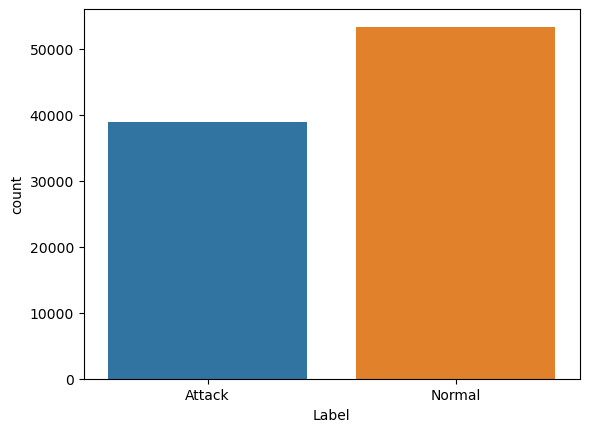

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Target Variable Distribution
print("Target Variable Distribution:")
print(ctu_data['Label'].value_counts())
sns.countplot(x='Label', data=ctu_data)
plt.show(); t=0.3

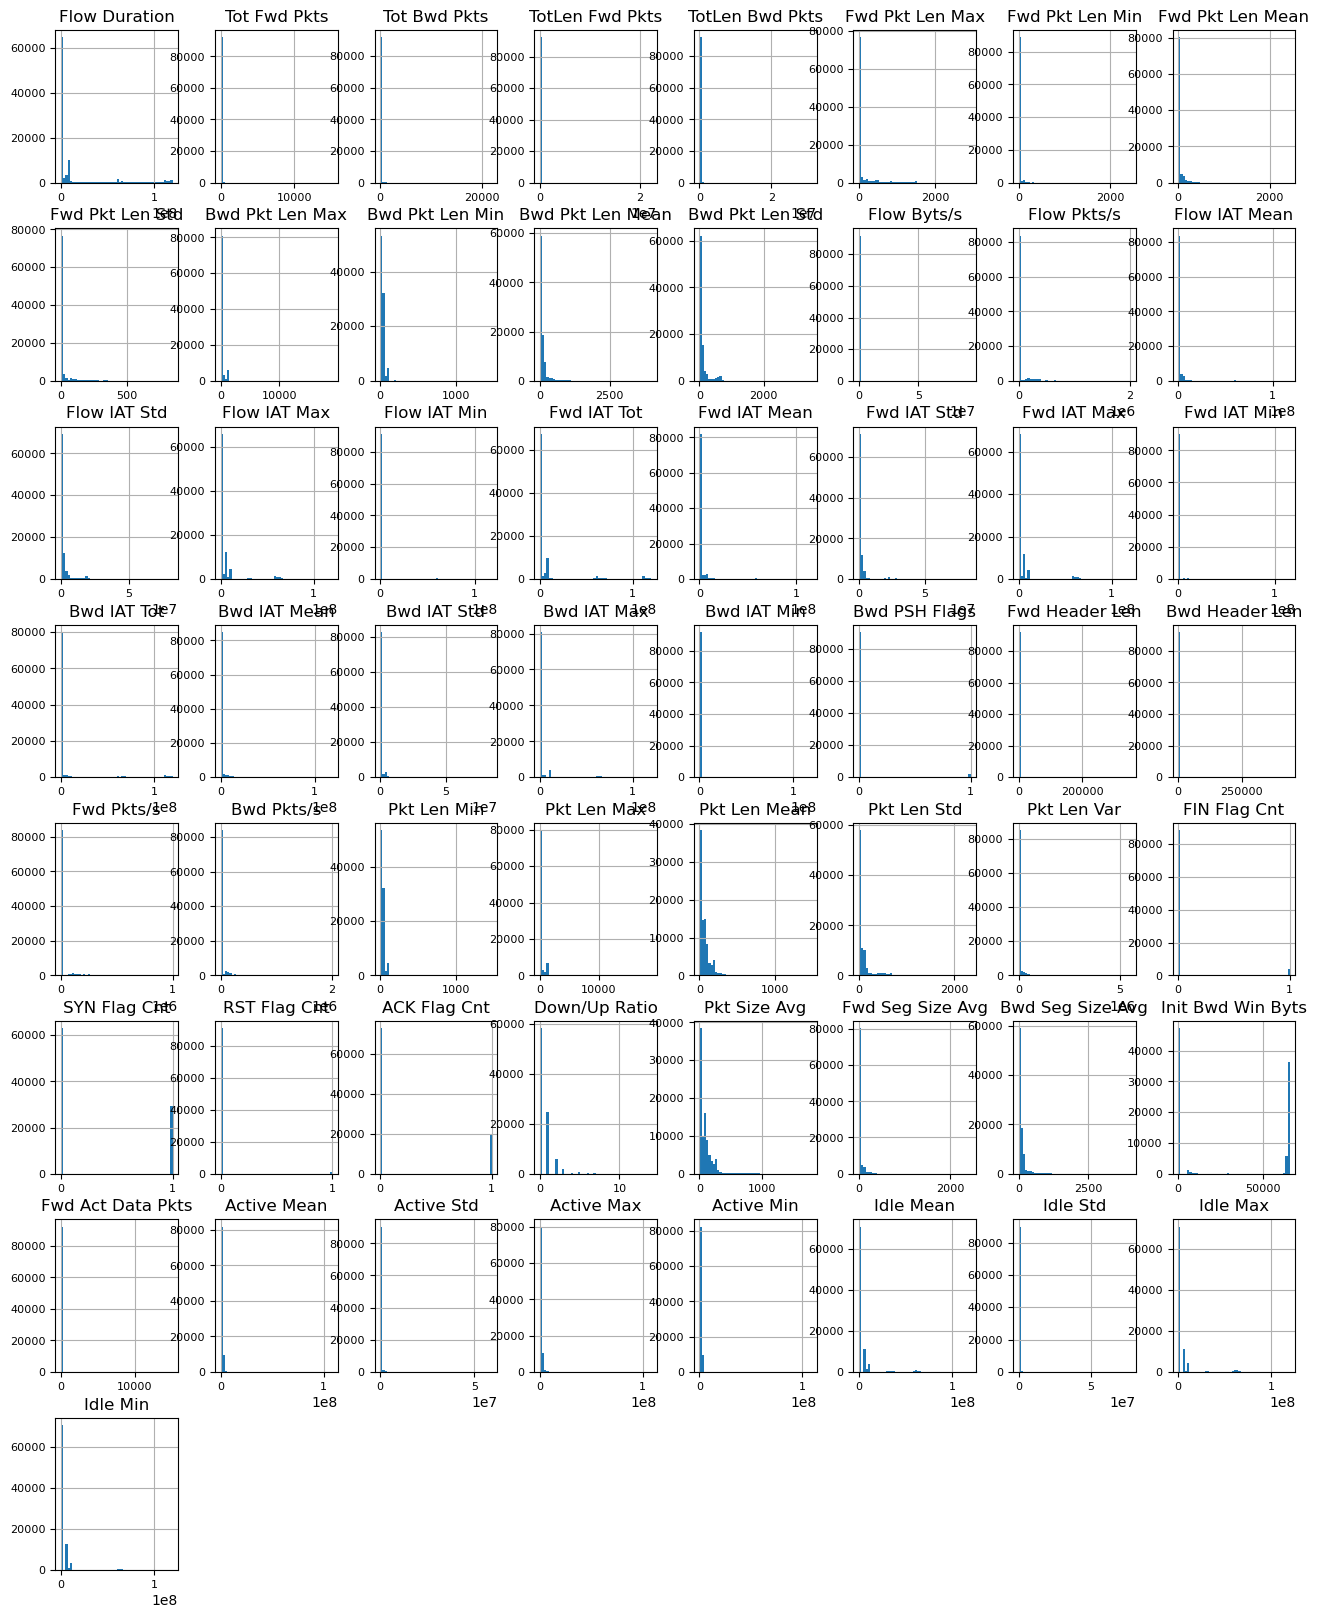

In [6]:
# Feature Analysis
# Numerical features
import numpy as np
numerical_features = ctu_data.select_dtypes(include=[np.number])
numerical_features.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)
plt.show()

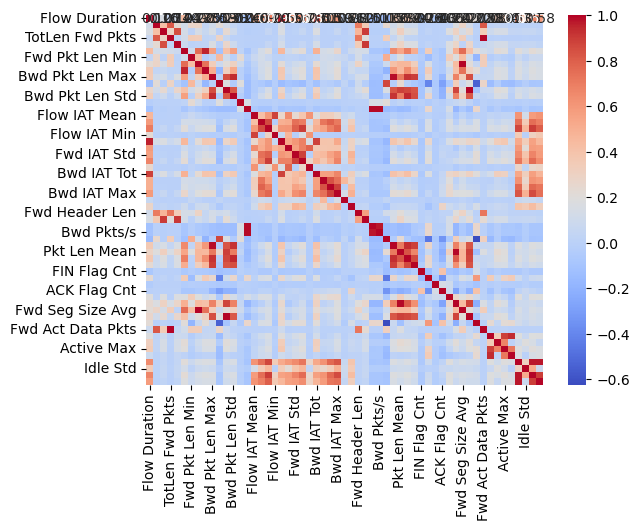

In [7]:
# Correlation Analysis
correlation_matrix = numerical_features.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.show()

##  Step 2: Data Cleaning

In [8]:
from sklearn.impute import SimpleImputer
# Handle Missing Values
# Impute missing values for numerical features with mean
imputer = SimpleImputer(strategy='mean')
ctu_data[numerical_features.columns] = imputer.fit_transform(ctu_data[numerical_features.columns])

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Encode Categorical Variables
# Assuming 'Label' is the target variable and the rest are features
# feat = ctu_data[0:(len(ctu_data) - int(t*len(ctu_data)))].reset_index(drop = True)
# feats = ctu_data[0:(len(ctu_data) - len(ctu_data[0:(len(ctu_data) - int(t*len(ctu_data)))]))].reset_index(drop = True)
# ctu_data = pd.concat([feat, feats]).reset_index().sample(frac = 1)
features = ctu_data.drop('Label', axis=1)
label_encoder = LabelEncoder()
ctu_data['Label'] = label_encoder.fit_transform(ctu_data['Label'])

# One-hot encoding for categorical features
features = pd.get_dummies(features)

# Split Data
X = features
y = ctu_data['Label']
trainX, testX, trainY, testY = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
X = features
y = ctu_data['Label']
trainX, testX, trainY, testY = train_test_split(X, y, test_size=0.2, random_state=42)

## Step 4: Data Visualization 

## Step 5: Feature Engineering 

In [11]:
# Importing preprocessing functions from sklearn library
from sklearn.preprocessing import StandardScaler #normalization
x_train = StandardScaler().fit_transform(trainX)
x_test = StandardScaler().fit_transform(testX)

## Step 6: PCA

In [12]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt 
pca = PCA(n_components=2)
principalComponentsTr = pca.fit_transform(x_train)
principalDfTrX = pd.DataFrame(data = principalComponentsTr)

principalComponentsTst = pca.fit_transform(x_test)
principalDfTstX = pd.DataFrame(data = principalComponentsTst)

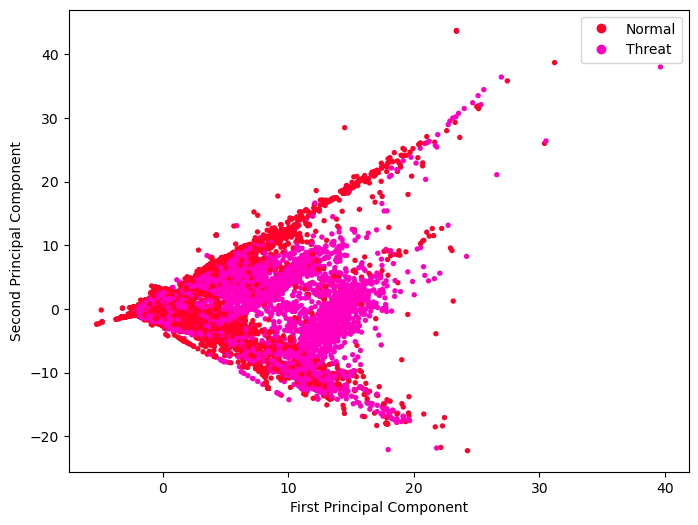

In [13]:
labels = ['Normal', 'Threat']
# giving a larger plot 
plt.figure(figsize =(8, 6)) 

scatter = plt.scatter(principalDfTrX[:][0], principalDfTrX[:][1],c = trainY.astype('category').cat.codes, cmap ='gist_rainbow', s=8) 
  
# labeling x and y axes 
plt.xlabel('First Principal Component') 
plt.ylabel('Second Principal Component')
plt.legend(handles=scatter.legend_elements()[0], labels = labels)
plt.show()

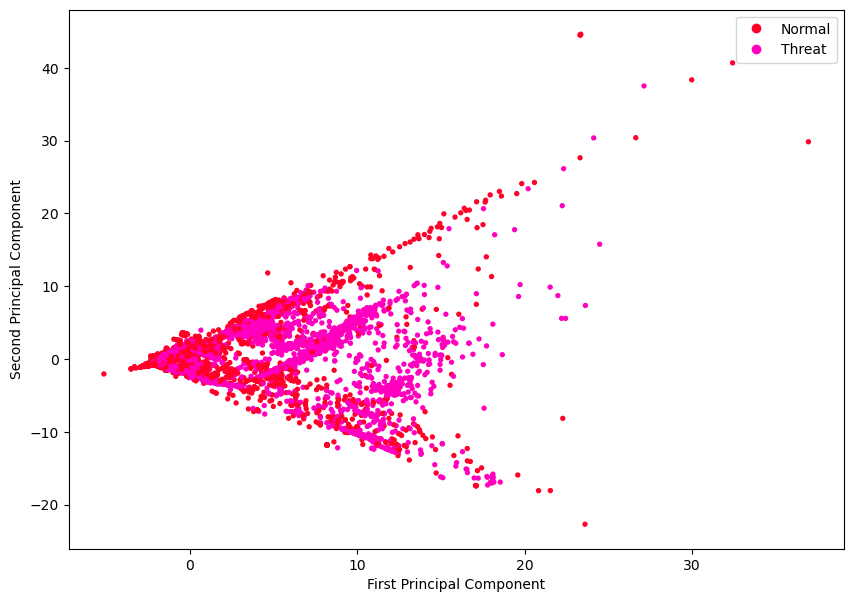

In [14]:
# giving a larger plot 
plt.figure(figsize =(10, 7)) 

scatter = plt.scatter(principalDfTstX[:][0], principalDfTstX[:][1],c = testY.astype('category').cat.codes, cmap ='gist_rainbow', s=8) 
  
# labeling x and y axes 
plt.xlabel('First Principal Component') 
plt.ylabel('Second Principal Component')
plt.legend(handles=scatter.legend_elements()[0], labels = labels)
plt.show()

## Step 6 and 7: Predictive Modelling and Results Visualization

##### Importing Required Libraries for preprocessing and performance measures

In [15]:
#Importing required libraries used for predictions and visualization
from sklearn.metrics import confusion_matrix, zero_one_loss, accuracy_score, classification_report, cohen_kappa_score, f1_score, precision_score, recall_score 
import seaborn as sn
import time

In [16]:
# from sklearn.model_selection import train_test_split
# trainX, testX, trainY, testY = train_test_split(trainX, trainY, random_state=0)

### a) Training/Testing and Individual Algorithm Comparison

#### Decision Tree Classifier

In [17]:
from sklearn.tree import DecisionTreeClassifier 
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

model = DecisionTreeClassifier(criterion='gini')
over = SMOTE()
under = RandomUnderSampler()
steps = [('o', over), ('u', under), ('model', model)]
classifier = Pipeline(steps=steps)

Comparison Table for Decision Tree Classifier


,Normal,Threat,accuracy,macro avg,weighted avg
precision,0.996272,0.996062,0.99615,0.996167,0.99615
recall,0.994610,0.997277,0.99615,0.995944,0.99615
f1-score,0.995440,0.996669,0.99615,0.996055,0.99615
support,7792.000000,10651.000000,0.99615,18443.000000,18443.00000


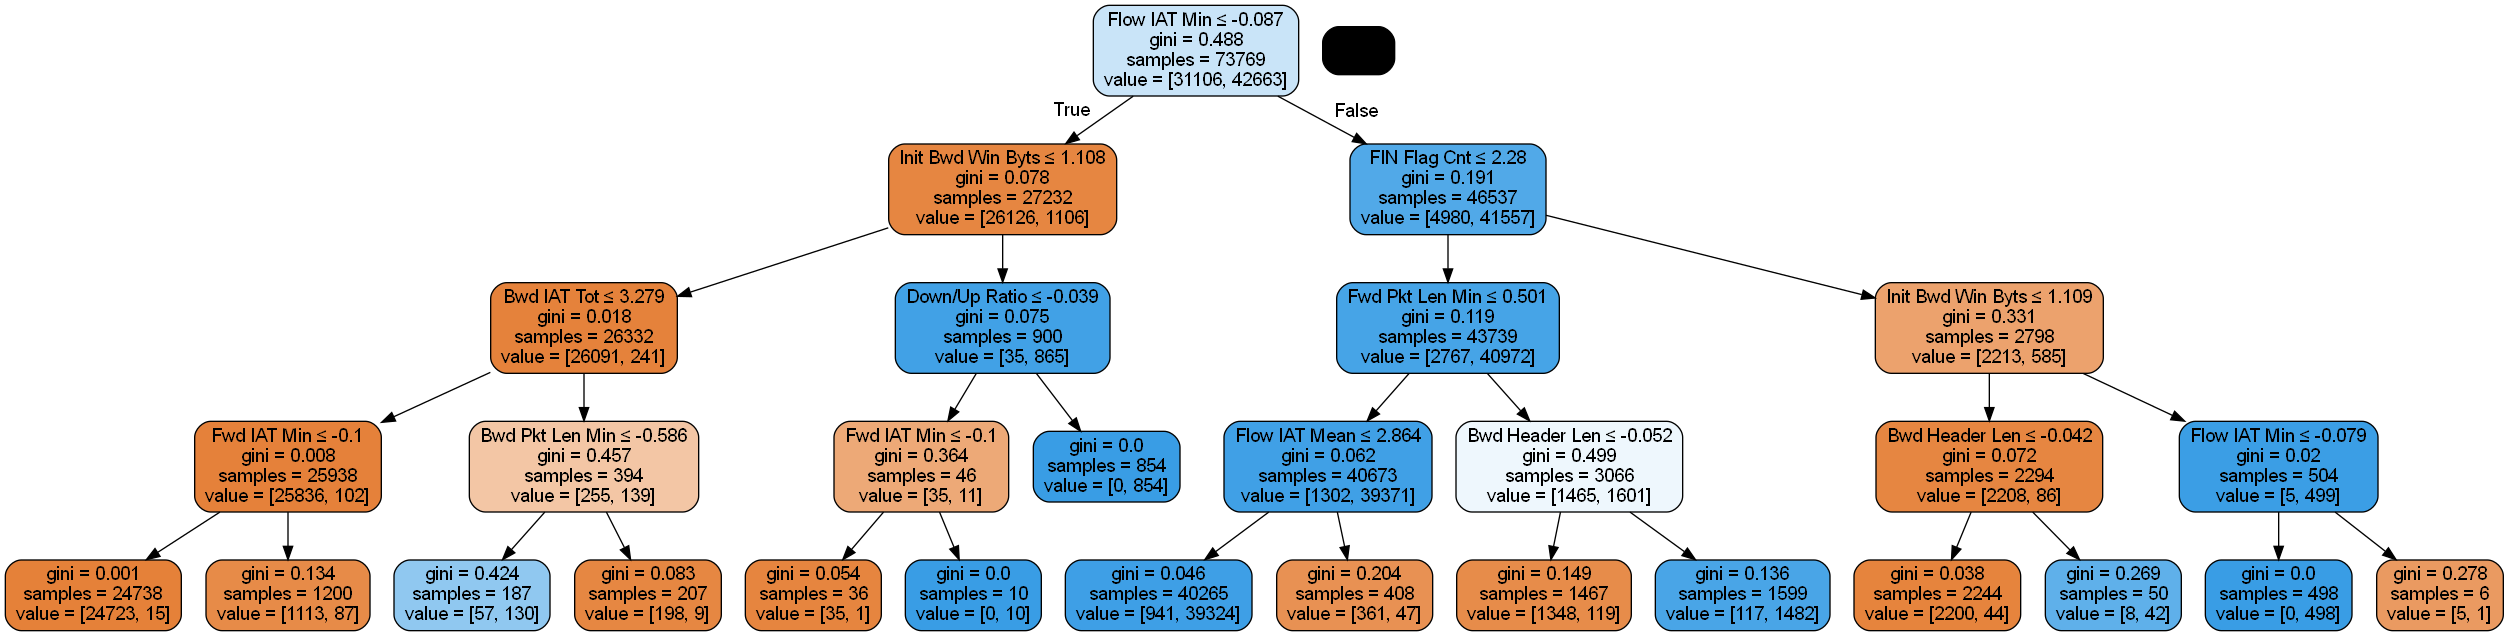

In [18]:
# from sklearn.tree import DecisionTreeClassifier 

# classifier = DecisionTreeClassifier(criterion='gini')

#Network fitting and time calcualtion
t = time.time() #Time start
clsf = classifier.fit(trainX, trainY)
#Prediction of test data
DT_pred_y = classifier.predict(testX)
#Classifier performance measures
results = confusion_matrix(testY, DT_pred_y)
error = zero_one_loss(testY, DT_pred_y)
DT_time = time.time() - t #Total time
DT_acc = round(accuracy_score(testY, DT_pred_y) * 100, 2)
DT_prec = round(precision_score(testY, DT_pred_y, average = 'weighted') * 100, 2)
DT_rec = round(recall_score(testY, DT_pred_y, average = 'weighted') * 100, 2)
DT_kappa = round(cohen_kappa_score(testY, DT_pred_y) * 100, 2)
DT_f1_sc = round(f1_score(testY, DT_pred_y, average = 'weighted') * 100, 2)
DT_err = round(zero_one_loss(testY, DT_pred_y) * 100, 2)
#Visualization of output performance measures
print("\033[1mComparison Table for Decision Tree Classifier\033[0m")
DT_clr = pd.DataFrame(classification_report(testY, DT_pred_y, target_names=labels, output_dict=True))
display(DT_clr)

from six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
clf = DecisionTreeClassifier(criterion='gini',max_depth = 4)
clf.fit(x_train, trainY)
export_graphviz(clf, out_file=dot_data,  
                filled = True, rounded = True,
                special_characters = True, feature_names = features.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('DT.png')
Image(graph.create_png())

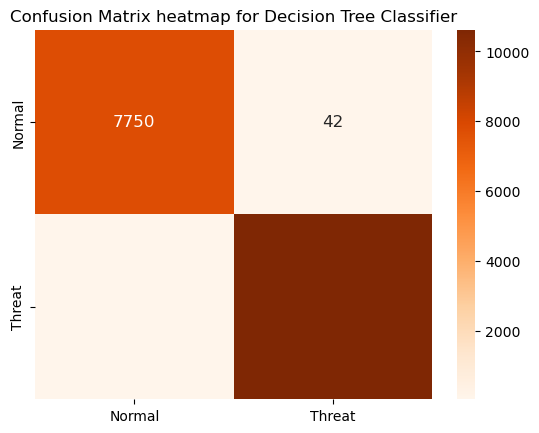

In [19]:
## Plotting of Confusion matrix if needed
df_cm = pd.DataFrame(results, index=labels, columns=labels)
sn.heatmap(df_cm, cmap='Oranges',annot=True, annot_kws={"size": 12}, fmt="d")
plt.title('Confusion Matrix heatmap for Decision Tree Classifier')
plt.show()

#### Random Forrest

In [20]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
over = SMOTE()
under = RandomUnderSampler()
steps = [('o', over), ('u', under), ('model', model)]
classifier = Pipeline(steps=steps)

Comparison Table for Random Forest Classifier


,Normal,Threat,accuracy,macro avg,weighted avg
precision,0.996534,0.997184,0.996909,0.996859,0.996909
recall,0.996150,0.997465,0.996909,0.996807,0.996909
f1-score,0.996342,0.997325,0.996909,0.996833,0.996909
support,7792.000000,10651.000000,0.996909,18443.000000,18443.000000


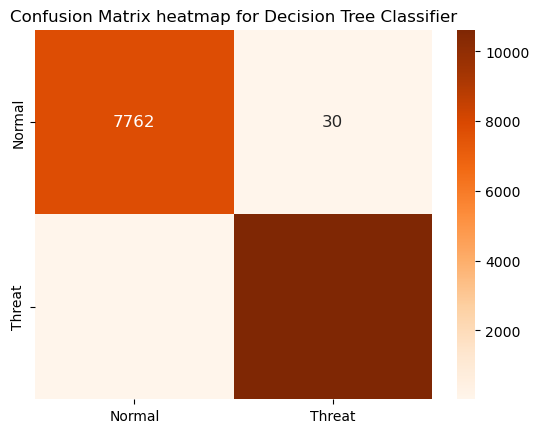

In [21]:
from sklearn.ensemble import RandomForestClassifier 

classifier = RandomForestClassifier()

#Network fitting and time calcualtion
t = time.time() #Time start
clsf = classifier.fit(trainX, trainY)
#Prediction of test data
RF_pred_y = classifier.predict(testX)
#Classifier performance measures
results = confusion_matrix(testY, RF_pred_y)
error = zero_one_loss(testY, RF_pred_y)
RF_time = time.time() - t #Total time
RF_acc = round(accuracy_score(testY, RF_pred_y) * 100, 2)
RF_prec = round(precision_score(testY, RF_pred_y, average = 'weighted') * 100, 2)
RF_rec = round(recall_score(testY, RF_pred_y, average = 'weighted') * 100, 2)
RF_kappa = round(cohen_kappa_score(testY, RF_pred_y) * 100, 2)
RF_f1_sc = round(f1_score(testY, RF_pred_y, average = 'weighted') * 100, 2)
RF_err = round(zero_one_loss(testY, RF_pred_y) * 100, 2)
#Visualization of output performance measures
print("\033[1mComparison Table for Random Forest Classifier\033[0m")
RF_clr = pd.DataFrame(classification_report(testY, RF_pred_y, target_names=labels, output_dict=True))
display(RF_clr)

## Plotting of Confusion matrix if needed
df_cm = pd.DataFrame(results, index=labels, columns=labels)
sn.heatmap(df_cm, cmap='Oranges',annot=True, annot_kws={"size": 12}, fmt="d")
plt.title('Confusion Matrix heatmap for Decision Tree Classifier')
plt.show()

#### K-Nearest Neighbor Classifier

In [22]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto',
                                  leaf_size=30)
over = SMOTE()
under = RandomUnderSampler()
steps = [('o', over), ('u', under), ('model', model)]
classifier = Pipeline(steps=steps)

Comparison Table for k-Nearest Neighbors


,Normal,Threat,accuracy,macro avg,weighted avg
precision,0.975575,0.977300,0.976576,0.976438,0.976571
recall,0.968814,0.982255,0.976576,0.975535,0.976576
f1-score,0.972183,0.979771,0.976576,0.975977,0.976565
support,7792.000000,10651.000000,0.976576,18443.000000,18443.000000


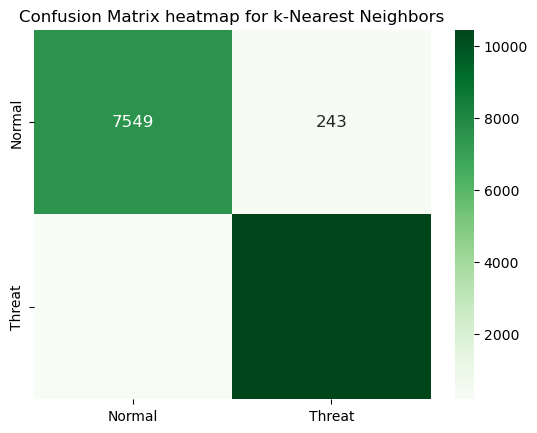

In [23]:
#Import classifier function from sklearn library
# from sklearn.neighbors import KNeighborsClassifier
# #Set classifier parameters according to the input data
# classifier = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto',
#                                   leaf_size=30)
#Network fitting and time calcualtion
t = time.time() #Time start
clsf = classifier.fit(trainX, trainY)
#Prediction of test data
knn_pred_y = classifier.predict(testX)
#Classifier performance measures
results = confusion_matrix(testY, knn_pred_y)
error = zero_one_loss(testY, knn_pred_y)
knn_time = time.time() - t #Total time
knn_acc = round(accuracy_score(testY, knn_pred_y) * 100, 2)
knn_prec = round(precision_score(testY, knn_pred_y, average = 'weighted') * 100, 2)
knn_rec = round(recall_score(testY, knn_pred_y, average = 'weighted') * 100, 2)
knn_kappa = round(cohen_kappa_score(testY, knn_pred_y) * 100, 2)
knn_f1_sc = round(f1_score(testY, knn_pred_y, average = 'weighted') * 100, 2)
knn_err = round(zero_one_loss(testY, knn_pred_y) * 100, 2)
#Visualization of output performance measures
print("\033[1mComparison Table for k-Nearest Neighbors\033[0m")
knn_clr = pd.DataFrame(classification_report(testY, knn_pred_y, target_names=labels, output_dict=True))
display(knn_clr)

##### Plotting of Confusion matrix if needed
df_cm = pd.DataFrame(results, index=labels, columns=labels)
sn.heatmap(df_cm, cmap='Greens',annot=True, annot_kws={"size": 12}, fmt="d") # font size
plt.title('Confusion Matrix heatmap for k-Nearest Neighbors')
plt.show()

#### Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
over = SMOTE()
under = RandomUnderSampler()
steps = [('o', over), ('u', under), ('model', model)]
classifier = Pipeline(steps=steps)

Comparison Table for Logistic Regression CLassifier


,Normal,Threat,accuracy,macro avg,weighted avg
precision,0.913827,0.921970,0.918614,0.917899,0.918530
recall,0.891427,0.938503,0.918614,0.914965,0.918614
f1-score,0.902488,0.930163,0.918614,0.916326,0.918471
support,7792.000000,10651.000000,0.918614,18443.000000,18443.000000


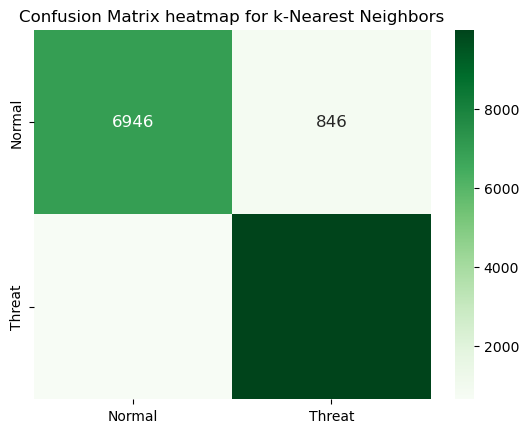

In [25]:
# #Import classifier function from sklearn library
# from sklearn.linear_model import LogisticRegression
# #Set classifier parameters according to the input data
# classifier = LogisticRegression()

#Network fitting and time calcualtion
t = time.time() #Time start
clsf = classifier.fit(x_train, trainY)
#Prediction of test data
LR_pred_y = classifier.predict(x_test)
#Classifier performance measures
results = confusion_matrix(testY, LR_pred_y)
error = zero_one_loss(testY, LR_pred_y)
LR_time = time.time() - t #Total time
LR_acc = round(accuracy_score(testY, LR_pred_y) * 100, 2)
LR_prec = round(precision_score(testY, LR_pred_y, average = 'weighted') * 100, 2)
LR_rec = round(recall_score(testY, LR_pred_y, average = 'weighted') * 100, 2)
LR_kappa = round(cohen_kappa_score(testY, LR_pred_y) * 100, 2)
LR_f1_sc = round(f1_score(testY, LR_pred_y, average = 'weighted') * 100, 2)
LR_err = round(zero_one_loss(testY, LR_pred_y) * 100, 2)
#Visualization of output performance measures
print("\033[1mComparison Table for Logistic Regression CLassifier\033[0m")
LR_clr = pd.DataFrame(classification_report(testY, LR_pred_y, target_names=labels, output_dict=True))
display(LR_clr)

##### Plotting of Confusion matrix if needed
df_cm = pd.DataFrame(results, index=labels, columns=labels)
sn.heatmap(df_cm, cmap='Greens',annot=True, annot_kws={"size": 12}, fmt="d") # font size
plt.title('Confusion Matrix heatmap for k-Nearest Neighbors')
plt.show()

#### SVM

In [26]:
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
model = make_pipeline(StandardScaler(), SVC(gamma='auto'))
over = SMOTE()
under = RandomUnderSampler()
steps = [('o', over), ('u', under), ('model', model)]
classifier = Pipeline(steps=steps)

Comparison Table for SVM


,Normal,Threat,accuracy,macro avg,weighted avg
precision,0.955801,0.966886,0.962208,0.961343,0.962202
recall,0.954697,0.967703,0.962208,0.961200,0.962208
f1-score,0.955249,0.967294,0.962208,0.961271,0.962205
support,7792.000000,10651.000000,0.962208,18443.000000,18443.000000


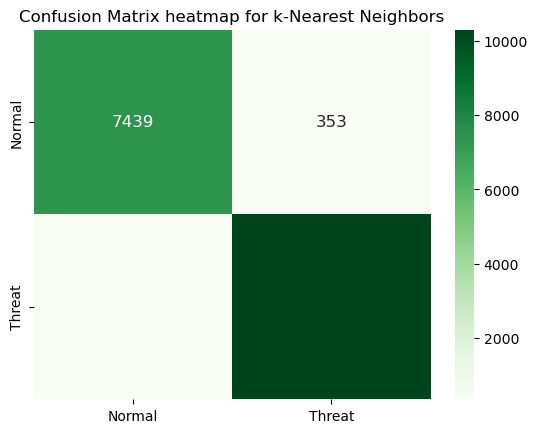

In [27]:
# #Import classifier function from sklearn library
# from sklearn.pipeline import make_pipeline
# from sklearn.svm import SVC
# #Set classifier parameters according to the input data

# classifier = make_pipeline(StandardScaler(), SVC(gamma='auto'))

#Network fitting and time calcualtion
t = time.time() #Time start
clsf = classifier.fit(trainX, trainY)
#Prediction of test data
svm_pred_y = classifier.predict(testX)
#Classifier performance measures
results = confusion_matrix(testY, svm_pred_y)
error = zero_one_loss(testY, svm_pred_y)
svm_time = time.time() - t #Total time
svm_acc = round(accuracy_score(testY, svm_pred_y) * 100, 2)
svm_prec = round(precision_score(testY, svm_pred_y, average = 'weighted') * 100, 2)
svm_rec = round(recall_score(testY, svm_pred_y, average = 'weighted') * 100, 2)
svm_kappa = round(cohen_kappa_score(testY, svm_pred_y) * 100, 2)
svm_f1_sc = round(f1_score(testY, svm_pred_y, average = 'weighted') * 100, 2)
svm_err = round(zero_one_loss(testY, svm_pred_y) * 100, 2)
#Visualization of output performance measures
print("\033[1mComparison Table for SVM\033[0m")
svm_clr = pd.DataFrame(classification_report(testY, svm_pred_y, target_names=labels, output_dict=True))
display(svm_clr)

##### Plotting of Confusion matrix if needed
df_cm = pd.DataFrame(results, index=labels, columns=labels)
sn.heatmap(df_cm, cmap='Greens',annot=True, annot_kws={"size": 12}, fmt="d") # font size
plt.title('Confusion Matrix heatmap for k-Nearest Neighbors')
plt.show()

#### Neural Network Classifier

In [28]:
#Import classifier function from sklearn library
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(activation='relu', hidden_layer_sizes=(100, 100))
over = SMOTE()
under = RandomUnderSampler()
steps = [('o', over), ('u', under), ('model', model)]
classifier = Pipeline(steps=steps)

Comparison Table for Neural Network


,Normal,Threat,accuracy,macro avg,weighted avg
precision,0.992635,0.989723,0.990945,0.991179,0.990953
recall,0.985883,0.994648,0.990945,0.990266,0.990945
f1-score,0.989247,0.992180,0.990945,0.990714,0.990941
support,7792.000000,10651.000000,0.990945,18443.000000,18443.000000


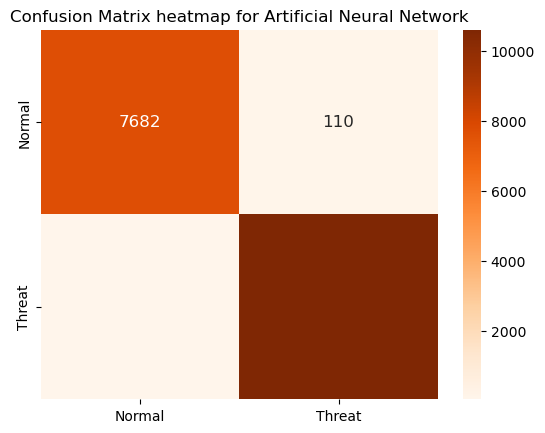

In [29]:
# #Import classifier function from sklearn library
# from sklearn.neural_network import MLPClassifier
# #Set classifier parameters according to the input data
# classifier = MLPClassifier(activation='relu', hidden_layer_sizes=(100, 100))
#Network fitting and time calcualtion
t = time.time() #Time start
clsf = classifier.fit(x_train, trainY)
#Prediction of test data
NN_pred_y = classifier.predict(x_test)
#Classifier performance measures
results = confusion_matrix(testY, NN_pred_y)
error = zero_one_loss(testY, NN_pred_y)
NN_time = time.time() - t #Total time
NN_acc = round(accuracy_score(testY, NN_pred_y) * 100, 2)
NN_prec = round(precision_score(testY, NN_pred_y, average = 'weighted') * 100, 2)
NN_rec = round(recall_score(testY, NN_pred_y, average = 'weighted') * 100, 2)
NN_kappa = round(cohen_kappa_score(testY, NN_pred_y) * 100, 2)
NN_f1_sc = round(f1_score(testY, NN_pred_y, average = 'weighted') * 100, 2)
NN_err = round(zero_one_loss(testY, NN_pred_y) * 100, 2)
#Visualization of output performance measures
print("\033[1mComparison Table for Neural Network\033[0m")
NN_clr = pd.DataFrame(classification_report(testY, NN_pred_y, target_names=labels, output_dict=True))
display(NN_clr)

##### Plotting of Confusion matrix if needed
df_cm = pd.DataFrame(results, index=labels, columns=labels)
sn.heatmap(df_cm, cmap='Oranges',annot=True, annot_kws={"size": 12}, fmt="d")
plt.title('Confusion Matrix heatmap for Artificial Neural Network')
plt.show()

#### AdaBoost

In [30]:
model = RandomForestClassifier()
over = SMOTE()
under = RandomUnderSampler()
steps = [('o', over), ('u', under), ('model', model)]
classifier = Pipeline(steps=steps)

Comparison Table for AdaBoost Classifier


,Normal,Threat,accuracy,macro avg,weighted avg
precision,0.985734,0.988557,0.987366,0.987146,0.987365
recall,0.984343,0.989578,0.987366,0.986961,0.987366
f1-score,0.985038,0.989068,0.987366,0.987053,0.987365
support,7792.000000,10651.000000,0.987366,18443.000000,18443.000000


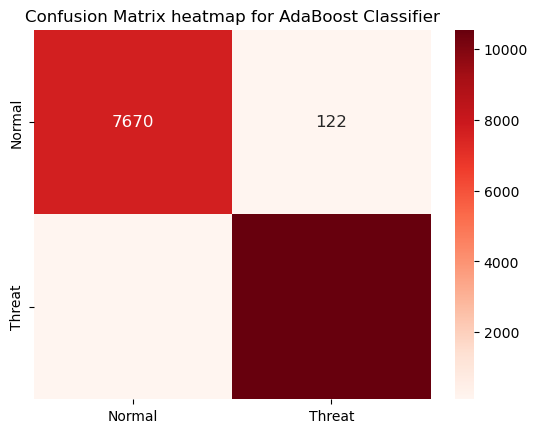

In [31]:
#Import classifier function from sklearn library
from sklearn.ensemble import AdaBoostClassifier
#Set classifier parameters according to the input data
classifier = AdaBoostClassifier(n_estimators=100, algorithm='SAMME')
#Network fitting and time calcualtion
t = time.time() #Time start
clsf = classifier.fit(trainX, trainY)
#Prediction of test data
AdB_pred_y = classifier.predict(testX)
#Classifier performance measures
results = confusion_matrix(testY, AdB_pred_y)
error = zero_one_loss(testY, AdB_pred_y)
AdB_time = time.time() - t #Total time
AdB_acc = round(accuracy_score(testY, AdB_pred_y) * 100, 2)
AdB_prec = round(precision_score(testY, AdB_pred_y, average = 'weighted') * 100, 2)
AdB_rec = round(recall_score(testY, AdB_pred_y, average = 'weighted') * 100, 2)
AdB_kappa = round(cohen_kappa_score(testY, AdB_pred_y) * 100, 2)
AdB_f1_sc = round(f1_score(testY, AdB_pred_y, average = 'weighted') * 100, 2)
AdB_err = round(zero_one_loss(testY, AdB_pred_y) * 100, 2)
#Visualization of output performance measures
print("\033[1mComparison Table for AdaBoost Classifier\033[0m")
AdB_clr = pd.DataFrame(classification_report(testY, AdB_pred_y, target_names=labels, output_dict=True))
display(AdB_clr)

## Plotting of Confusion matrix if needed
df_cm = pd.DataFrame(results, index=labels, columns=labels)
sn.heatmap(df_cm, cmap='Reds',annot=True, annot_kws={"size": 12}, fmt="d") # font size
plt.title('Confusion Matrix heatmap for AdaBoost Classifier')
plt.show()

### b) Overall Comparisons

#### Table comparison between all algorithms performance measures

In [32]:
#Saving all algorithms in single dataframe
overall = pd.DataFrame({'Algorithm': ['DeciTree', 'RanForest', 'kNN', 'LR', 'SVM', 'DNN', 'AdaBoost'],
                    'Accuracy(%)': [DT_acc, RF_acc, knn_acc, LR_acc, svm_acc, NN_acc, AdB_acc],
                   'Precision(%)': [DT_prec, RF_prec, knn_prec, LR_prec, svm_prec, NN_prec, AdB_prec],
                   'Recall(%)': [DT_rec, RF_rec, knn_rec, LR_rec, svm_rec, NN_rec, AdB_rec],
                    'F1-Score(%)': [DT_f1_sc, RF_f1_sc, knn_f1_sc, LR_f1_sc, svm_f1_sc, NN_f1_sc, AdB_f1_sc],
                   'Error(%)': [DT_err, RF_err, knn_err, LR_err, svm_err, NN_err, AdB_err],
                     'Time(s)': [DT_time, RF_time, knn_time, LR_time, svm_time, NN_time, AdB_time]})
display(overall)

,Algorithm,Accuracy(%),Precision(%),Recall(%),F1-Score(%),Error(%),Time(s)
0,DeciTree,99.62,99.62,99.62,99.61,0.38,6.938553
1,RanForest,99.69,99.69,99.69,99.69,0.31,23.255172
2,kNN,97.66,97.66,97.66,97.66,2.34,12.079463
3,LR,91.86,91.85,91.86,91.85,8.14,4.453582
4,SVM,96.22,96.22,96.22,96.22,3.78,200.401616
5,DNN,99.09,99.10,99.09,99.09,0.91,86.261030
6,AdaBoost,98.74,98.74,98.74,98.74,1.26,33.070920


#### Bar plot comparison between accuracy of different algorithms

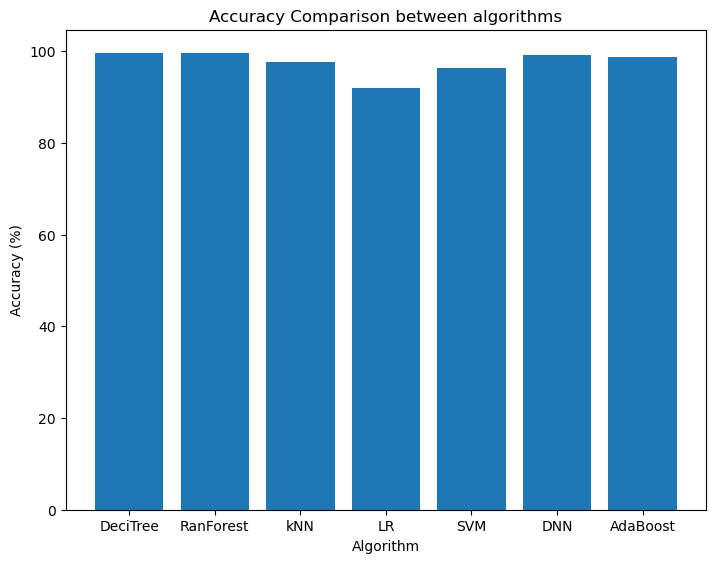

In [33]:
all_acc = [DT_acc, RF_acc, knn_acc, LR_acc, svm_acc, NN_acc, AdB_acc]
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
algos = ['DeciTree', 'RanForest', 'kNN', 'LR', 'SVM', 'DNN', 'AdaBoost']
ax.bar(algos, all_acc)
plt.title('Accuracy Comparison between algorithms')
plt.xlabel('Algorithm')
plt.ylabel('Accuracy (%)')
plt.show()

# The END